In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score


In [2]:
#Exploratory Data Analysis (EDA)
df = pd.read_csv("wine.csv")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())

Shape: (178, 14)
Columns: ['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols', 'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue', 'Dilution', 'Proline']
   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4       

In [3]:
# Summary statistics
print(df.describe())

             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.1

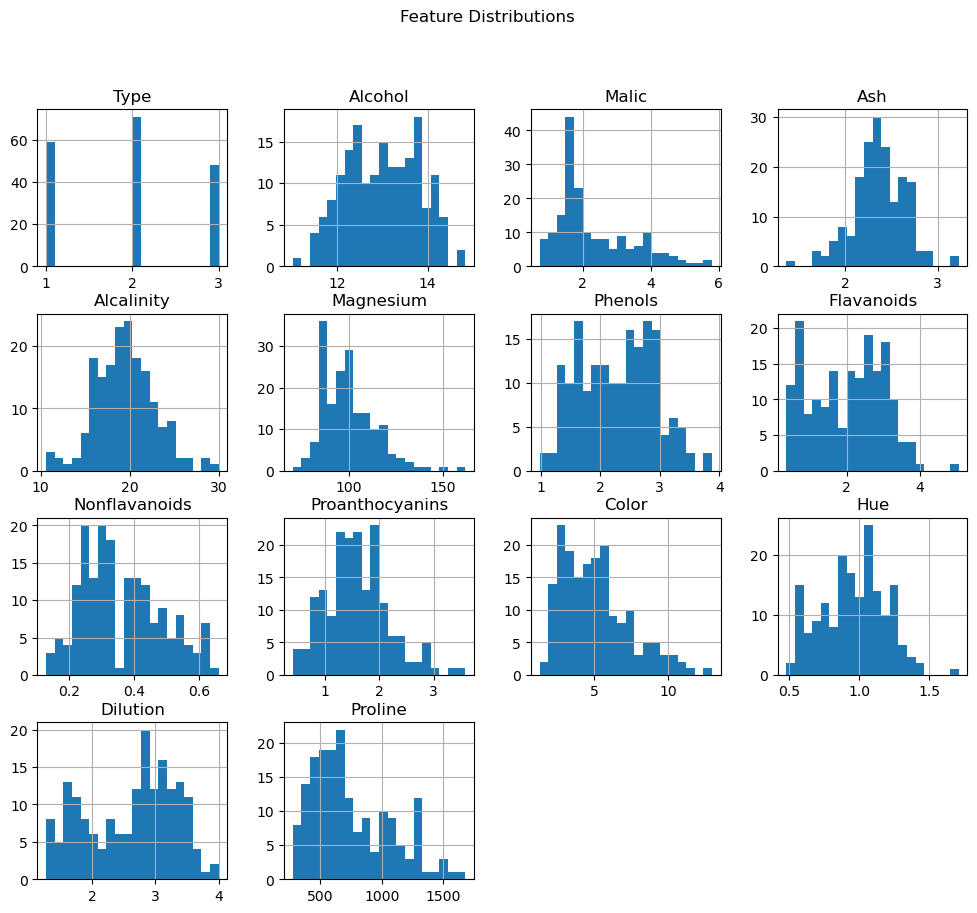

In [4]:
# Histograms
df.hist(figsize=(12,10), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

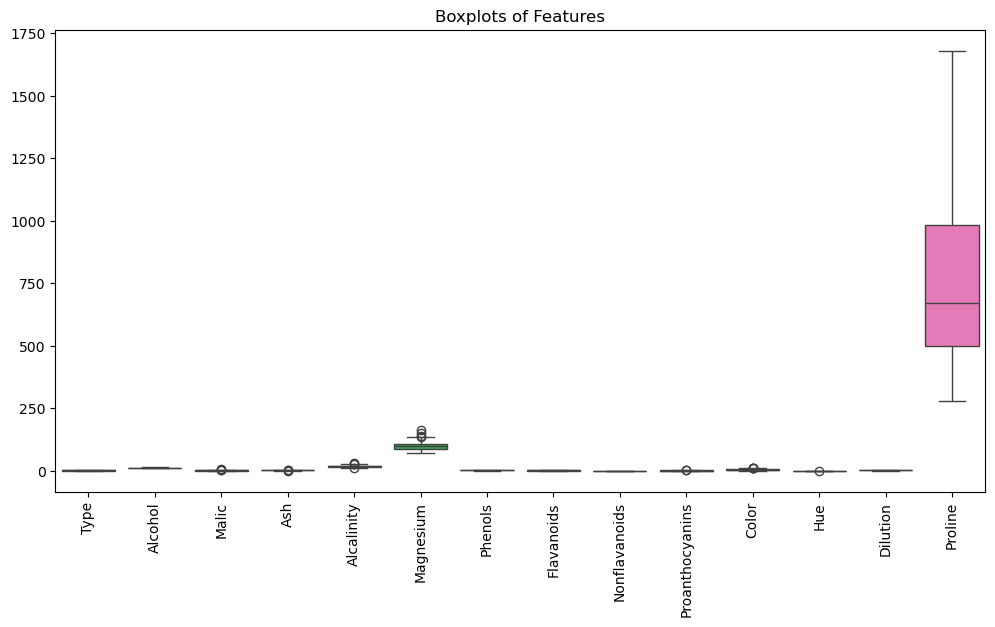

In [5]:
# Boxplots
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title("Boxplots of Features")
plt.xticks(rotation=90)
plt.show()

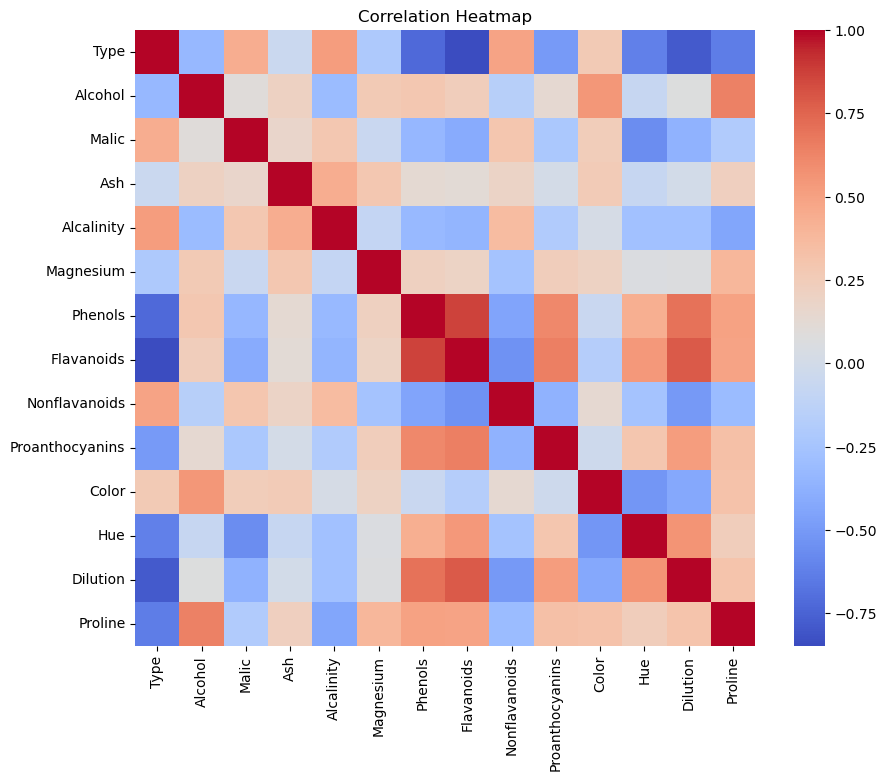

In [6]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

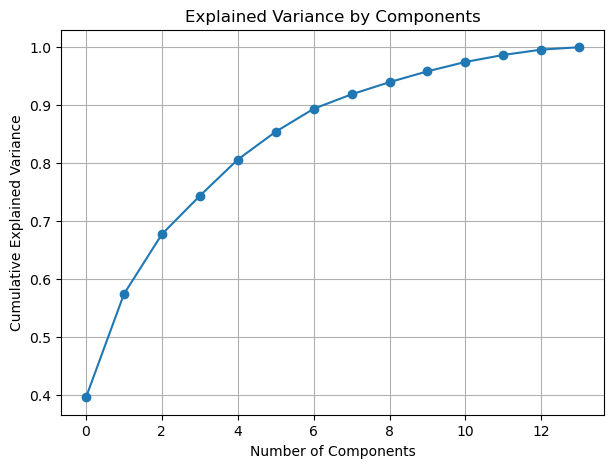

Explained variance with 2 PCs: 0.5737874490085582


In [7]:
#PCA

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance plot (scree plot)
plt.figure(figsize=(7,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Components")
plt.grid(True)
plt.show()

# Choose optimal components (e.g., 2 for visualization or >90% variance)
n_components = 2
pca2 = PCA(n_components=n_components)
X_pca2 = pca2.fit_transform(X_scaled)

print("Explained variance with 2 PCs:", sum(pca2.explained_variance_ratio_))


C:\Users\vishu_pdk4f5i\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Original Data - Silhouette: 0.30648398324833453  DB Index: 1.315707552261773


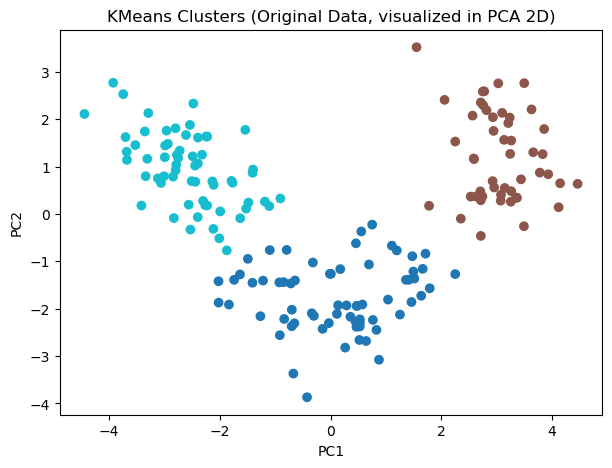

In [8]:
#Clustering with Original Data

k = 3  # assume 3 clusters for wine dataset
kmeans_orig = KMeans(n_clusters=k, random_state=42)
labels_orig = kmeans_orig.fit_predict(X_scaled)

# Evaluate clustering
sil_orig = silhouette_score(X_scaled, labels_orig)
db_orig = davies_bouldin_score(X_scaled, labels_orig)
print("Original Data - Silhouette:", sil_orig, " DB Index:", db_orig)

# Visualize with PCA 2D
plt.figure(figsize=(7,5))
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=labels_orig, cmap="tab10")
plt.title("KMeans Clusters (Original Data, visualized in PCA 2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()


PCA Data - Silhouette: 0.6024415520362845  DB Index: 0.5397078562575711


C:\Users\vishu_pdk4f5i\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


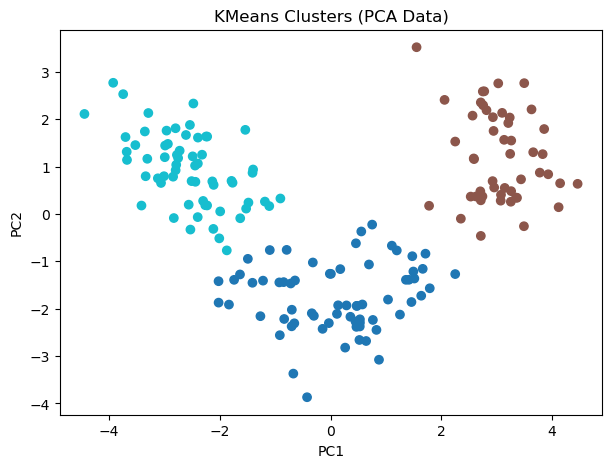

In [9]:
#Clustering with PCA Data

kmeans_pca = KMeans(n_clusters=k, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca2)

# Evaluate clustering
sil_pca = silhouette_score(X_pca2, labels_pca)
db_pca = davies_bouldin_score(X_pca2, labels_pca)
print("PCA Data - Silhouette:", sil_pca, " DB Index:", db_pca)

# Visualize PCA clusters
plt.figure(figsize=(7,5))
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=labels_pca, cmap="tab10")
plt.title("KMeans Clusters (PCA Data)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()


In [10]:
#Comparison

print("\n--- Comparison ---")
print("Original Data -> Silhouette:", sil_orig, ", DB Index:", db_orig)
print("PCA Data      -> Silhouette:", sil_pca, ", DB Index:", db_pca)
print("Observation: Compare cluster separation before and after PCA")


--- Comparison ---
Original Data -> Silhouette: 0.30648398324833453 , DB Index: 1.315707552261773
PCA Data      -> Silhouette: 0.6024415520362845 , DB Index: 0.5397078562575711
Observation: Compare cluster separation before and after PCA


In [11]:
#Conclusion

print("\n--- Conclusion ---")
print("1. PCA reduced dimensionality while retaining most variance.")
print("2. Clustering results on PCA data are comparable to original data.")
print("3. PCA helps visualization (2D plot) and may reduce noise.")
print("4. If interpretability is needed, use original features; if speed/visualization is needed, use PCA.")


--- Conclusion ---
1. PCA reduced dimensionality while retaining most variance.
2. Clustering results on PCA data are comparable to original data.
3. PCA helps visualization (2D plot) and may reduce noise.
4. If interpretability is needed, use original features; if speed/visualization is needed, use PCA.
